In [1]:
import env
import agents

### Load the environment and the agent

In [2]:
#Creates the environment
cliff = env.Cliff(nb_col=5, nb_line=4, reward_step=0, reward_end=10, reward_fall=-10)

#Extracts the data for the agent
action_shape = cliff.action_shape
space_shape = cliff.space_shape
transition_function = cliff.transition_function

In [3]:
#Creates the agent and initializes the distributions
agent = agents.DistributionalAgent(space_shape, action_shape, transition_function, gamma=0.9, projection_type="None", resolution=0)

## Control

Defines criteria to decide how to choose the "best" distribution

In [4]:
#Optimize on the mean
def mean_criterion(distrib1, distrib2):
    return distrib1.mean > distrib2.mean

#Optimize on a quantile
quantile_criterion = lambda q : (lambda d1, d2 : d1.quantile(q) > d2.quantile(q))

q_10 = quantile_criterion(0.1)
median_criterion = quantile_criterion(0.5)

Apply the optimal Bellman operator a few times

In [5]:
agent.initialize()
for iteration in range(10):
    agent.control(mean_criterion)

Visualize a distribution

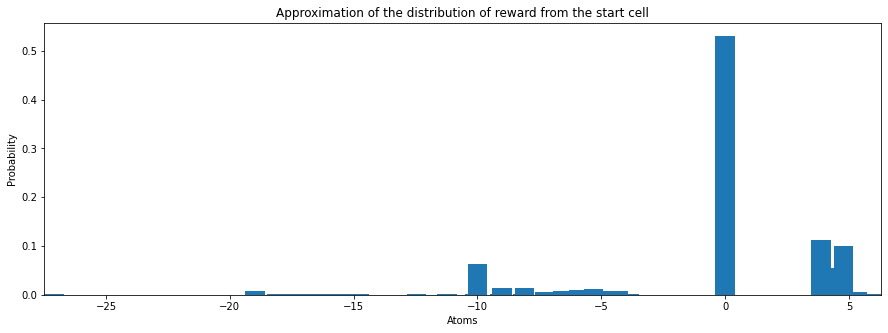

In [6]:
state, action = (0,0), env.Action.Up.value
agent.plot(state, action, title="Approximation of the distribution of reward from the start cell")

Print the best actions :

In [7]:
actions = agent.optimal_actions(mean_criterion)
cliff.display_actions(actions)

→ → → → ↓ 
→ → → → ↓ 
↑ ↑ → → ↓ 
↑ → → ↑ ↓ 


Now everything but with a projection at each step :

→ → → → ↓ 
→ → → → ↓ 
↑ ↑ → → ↓ 
↑ → → ↑ ↓ 


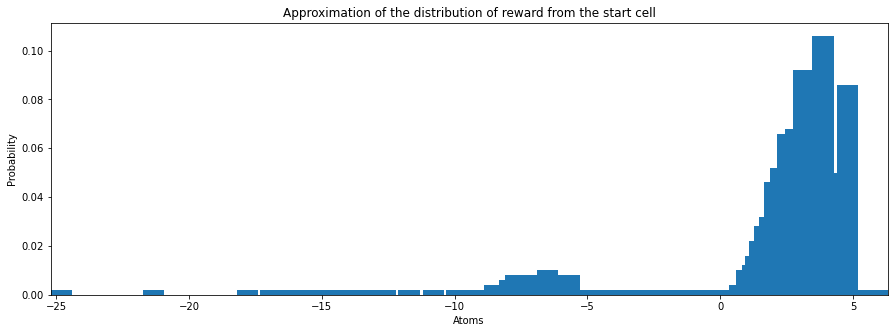

In [8]:
agent.initialize()
agent.projection_type = "quantile"
agent.resolution = 500

for iteration in range(50):
    agent.control(mean_criterion)

state, action = (0,0), env.Action.Up.value
agent.plot(state, action, title="Approximation of the distribution of reward from the start cell")

actions = agent.optimal_actions(mean_criterion)
cliff.display_actions(actions)

In [9]:
distrib = agent.get_distribution(state, action)
print("Mean return : {}".format(distrib.mean))
print("Median of the return : {}".format(distrib.quantile(0.5)))

Mean return : 0.8680633110759932
Median of the return : 2.541865828329


Comparison when optimizing on the median :

→ ↓ ↓ ↓ ↓ 
→ → → ↓ ↓ 
→ → → → ↓ 
↑ → ↑ ↑ ↓ 


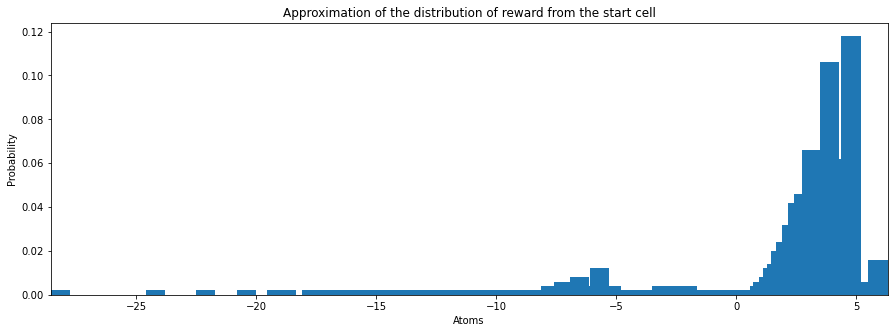

In [10]:
agent.initialize()
agent.projection_type = "quantile"
agent.resolution = 500

for iteration in range(50):
    agent.control(median_criterion)

state, action = (0,0), env.Action.Up.value
agent.plot(state, action, title="Approximation of the distribution of reward from the start cell")

actions = agent.optimal_actions(median_criterion)
cliff.display_actions(actions)

In [11]:
distrib = agent.get_distribution(state, action)
print("Mean return : {}".format(distrib.mean))
print("Median of the return : {}".format(distrib.quantile(0.5)))

Mean return : -0.11720256491782356
Median of the return : 2.541865828329


## Policy Evaluation

Define a policy to evaluate

In [12]:
def safe_policy(state):
    #Rester le plus en haut possible avant d’aller à droite, et ne descendre que tout a droite
    x,y = state
    if x==4:
        return env.Action.Down.value
    elif y==3:
        return env.Action.Right.value
    else:
        return env.Action.Up.value

def greedy_policy(state):
    #Contourner la falaise
    x,y = state
    if x == 0 and y == 0:
        return env.Action.Up.value
    elif x == 4:
        return env.Action.Down.value
    else:
        return env.Action.Right.value

Apply the Bellman operator a few times

In [13]:
agent.initialize()
agent.projection_type = "None"
for iteration in range(10):
    agent.evaluate(safe_policy)

Visualize a distribution :

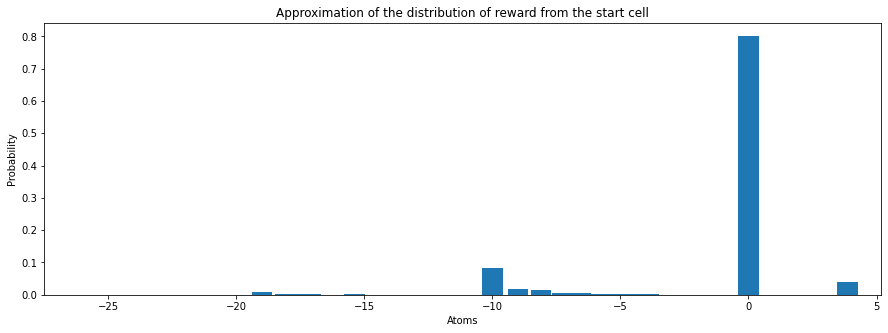

In [14]:
state, action = (0,0), env.Action.Up.value
agent.plot(state, action, title="Approximation of the distribution of reward from the start cell")

Now everything but with a projection :

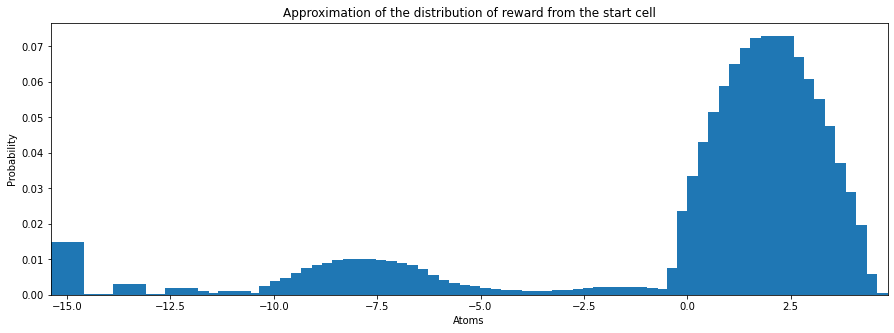

In [15]:
agent.initialize()
agent.projection_type = "categorical"
agent.vmin, agent.vmax = -15, 10
agent.resolution = 100

for iteration in range(50):
    agent.evaluate(safe_policy)

state, action = (0,0), env.Action.Up.value
agent.plot(state, action, title="Approximation of the distribution of reward from the start cell")


Note : For better display, a lower bound have been set to -15, when it can actually go lower than that. This explains the spike we can observe at -15 reward. This also leads to some more approximation errors in the computation of the reward distribution